In [1]:
import pandas as pd
import numpy as np

In [7]:
# load the titanic dataset from the full path
df = pd.read_csv(r'C:\Users\matte\Desktop\datasets\seaborn_datasets\titanic.csv')

# sample DataFrame using numpy (np was imported in another cell)
data = pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.rand(5),
    'C': np.random.rand(5)
})

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
print("--- SITUAZIONE INIZIALE ---")
print(f"Dimensioni dataset: {df.shape}")
print(df.isnull().sum()) # Vediamo dove sono i buchi

--- SITUAZIONE INIZIALE ---
Dimensioni dataset: (891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
# 1. GESTIONE DUPLICATI
# L'infografica suggerisce .duplicated() e .drop_duplicates()
num_duplicati = df.duplicated().sum()
print(f"\nDuplicati trovati: {num_duplicati}")

if num_duplicati > 0:
    df = df.drop_duplicates()
    print(f"Duplicati rimossi. Nuove dimensioni: {df.shape}")


Duplicati trovati: 107
Duplicati rimossi. Nuove dimensioni: (784, 15)


In [16]:
# A) Colonna 'age': Ci sono molti nulli.
# Invece di cancellare le righe (perderemmo troppi dati), riempiamo con la media.
# Metodo .fillna() citato nell'infografica
media_eta = df['age'].mean()
df['age'] = df['age'].fillna(media_eta)
print(f"\nEtà mancanti riempite con la media: {media_eta:.1f} anni")


Età mancanti riempite con la media: 29.9 anni


In [19]:
if 'deck' in df.columns:
    # Convertiamo in stringa e aggiungiamo la categoria se necessario
    df['deck'] = df['deck'].astype(object).fillna('U')
    print("Ponti mancanti segnati come 'U' (Unknown)")

Ponti mancanti segnati come 'U' (Unknown)


In [20]:
df = df.dropna(subset=['embarked'])
print("Righe con imbarco mancante rimosse.")

Righe con imbarco mancante rimosse.


In [21]:
# 3. CORREZIONE TIPI DI DATI
# L'infografica suggerisce .astype().
# Esempio: 'survived' è 0 o 1, ma concettualmente è una categoria (No/Sì) o booleano.
# Possiamo lasciarlo così per i calcoli, o convertirlo per chiarezza nei grafici.
df['sex'] = df['sex'].astype('category')
df['class'] = df['class'].astype('category')

print("\n--- PULIZIA COMPLETATA ---")
print(df.info())


--- PULIZIA COMPLETATA ---
<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     782 non-null    int64   
 1   pclass       782 non-null    int64   
 2   sex          782 non-null    category
 3   age          782 non-null    float64 
 4   sibsp        782 non-null    int64   
 5   parch        782 non-null    int64   
 6   fare         782 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        782 non-null    category
 9   who          782 non-null    object  
 10  adult_male   782 non-null    bool    
 11  deck         782 non-null    object  
 12  embark_town  782 non-null    object  
 13  alive        782 non-null    object  
 14  alone        782 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None


Text(0.5, 1.0, 'Sopravvivenza per Sesso')

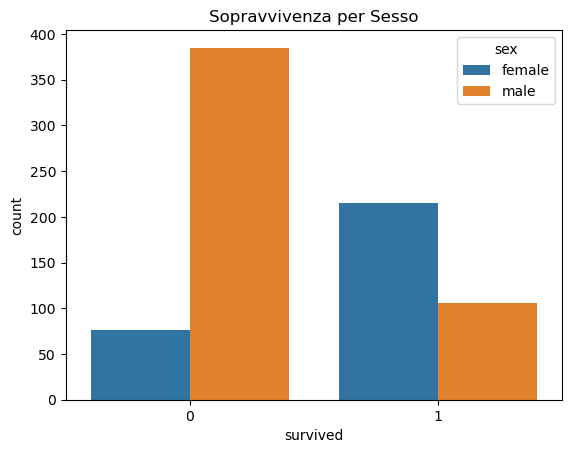

In [22]:
sns.countplot(data=df, x='survived', hue='sex')
plt.title('Sopravvivenza per Sesso')    

In [23]:
# Esercizion2 
# --- FASE 1: Caricamento ---
url = "https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv"
df_stock = pd.read_csv(url)

In [24]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [25]:
print("Valori nulli per colonna:\n", df_stock.isnull().sum())

Valori nulli per colonna:
 MSFT    0
IBM     0
SBUX    0
AAPL    0
GSPC    0
Date    0
dtype: int64


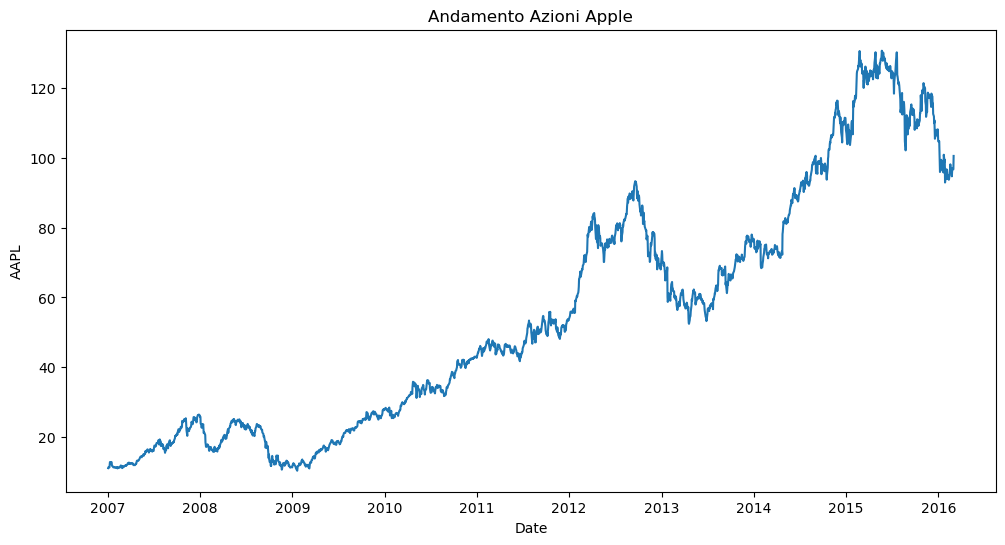

In [26]:
# 1. Andamento Apple
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stock, x='Date', y='AAPL')
plt.title("Andamento Azioni Apple")
plt.show()

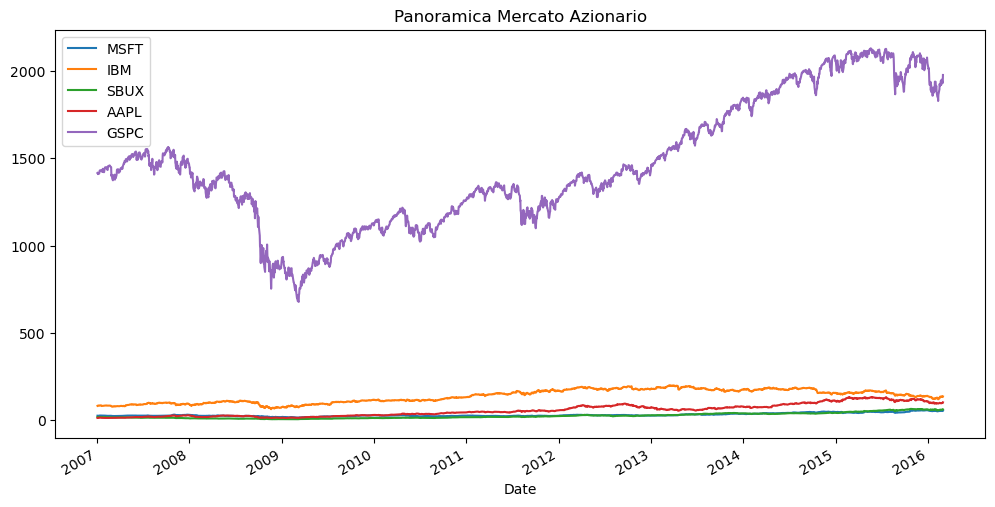

In [27]:
# 2. Andamento Tutte le Azioni
# Pandas plot gestisce bene più colonne contemporaneamente
df_stock.set_index('Date').plot(figsize=(12, 6))
plt.title("Panoramica Mercato Azionario")
plt.show()

In [28]:
# 3. MSFT vs IBM (2012-2013)
# Grazie alla Fase 2 (to_datetime), ora possiamo usare .dt.year
mask_years = (df_stock['Date'].dt.year >= 2012) & (df_stock['Date'].dt.year <= 2013)
df_filtered = df_stock[mask_years]

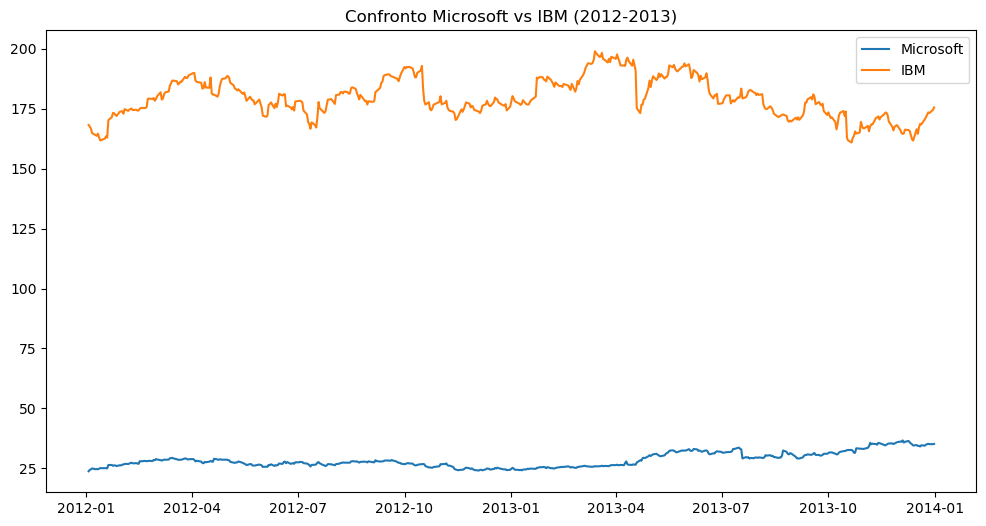

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['MSFT'], label='Microsoft')
plt.plot(df_filtered['Date'], df_filtered['IBM'], label='IBM')
plt.legend()
plt.title("Confronto Microsoft vs IBM (2012-2013)")
plt.show()

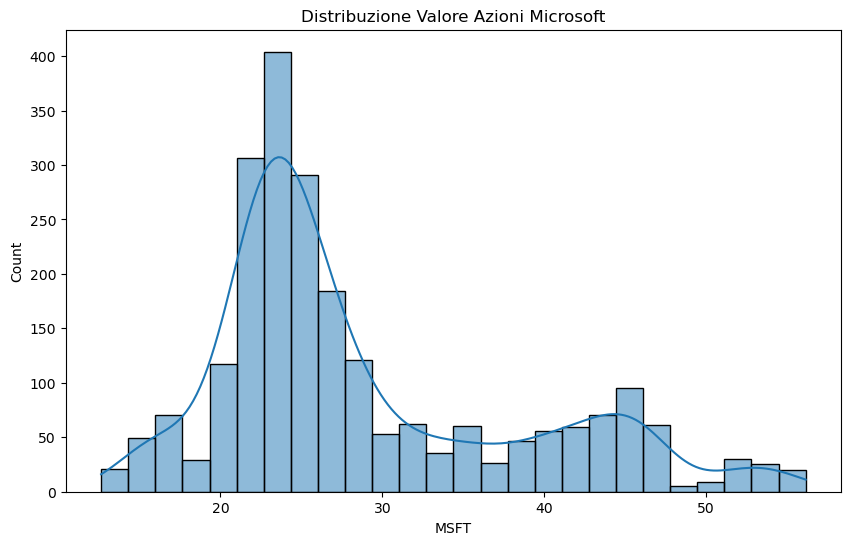

In [30]:
# 4. Range frequente Microsoft (Istogramma)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_stock, x='MSFT', kde=True)
plt.title("Distribuzione Valore Azioni Microsoft")
plt.show()

In [33]:
#esercizio 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
# --- FASE 1: Caricamento ---
path = r"C:\Users\matte\Desktop\datasets\altri_dataset\metal_bands_2017.csv"

# Aggiungiamo encoding='latin-1' perché spesso questo dataset ha caratteri speciali
try:
    df = pd.read_csv(path, encoding='latin-1')
except FileNotFoundError:
    print(f"Errore: File non trovato nel percorso: {path}")
    print("Controlla che il nome del file sia esattamente 'metal_bands_2017.csv'")
    exit() # Interrompe lo script se il file non c'è

In [34]:
print("--- Anteprima Dataset ---")
print(df.head())
print(df.info())

--- Anteprima Dataset ---
   Unnamed: 0    band_name  fans formed          origin split  \
0           0  Iron Maiden  4195   1975  United Kingdom     -   
1           1        Opeth  4147   1990          Sweden  1990   
2           2    Metallica  3712   1981             USA     -   
3           3     Megadeth  3105   1983             USA  1983   
4           4  Amon Amarth  3054   1988          Sweden     -   

                                              style  
0                   New wave of british heavy,Heavy  
1  Extreme progressive,Progressive rock,Progressive  
2                             Heavy,Bay area thrash  
3                            Thrash,Heavy,Hard rock  
4                                     Melodic death  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   band_name   5000 non-null   

In [35]:
if 'formed' in df.columns:
    df['formed'] = pd.to_numeric(df['formed'], errors='coerce')

In [36]:
df['fans'] = pd.to_numeric(df['fans'], errors='coerce')

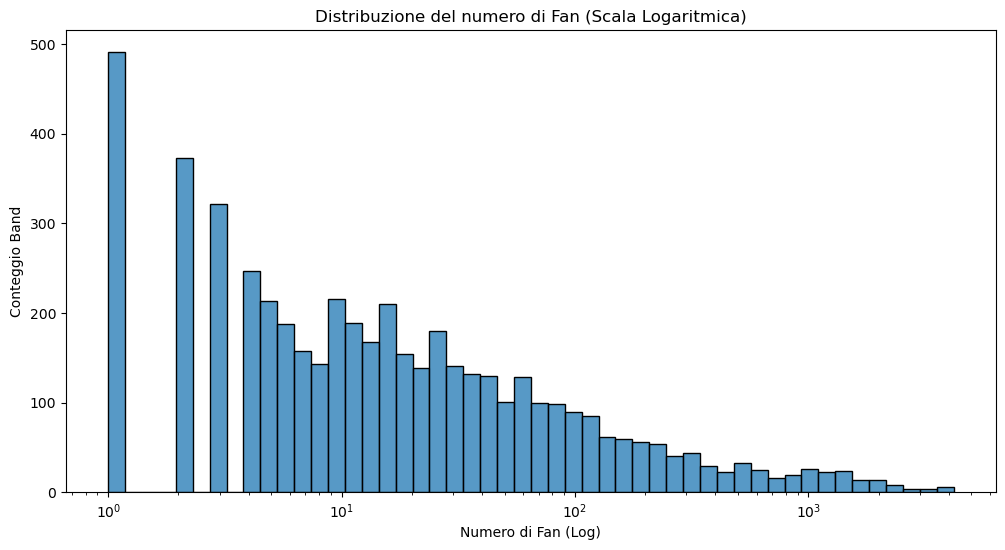

In [37]:
plt.figure(figsize=(12, 6))
# Usiamo log_scale=True perché spesso poche band hanno milioni di fan e molte ne hanno pochi
sns.histplot(data=df, x='fans', bins=50, log_scale=True) 
plt.title("Distribuzione del numero di Fan (Scala Logaritmica)")
plt.xlabel("Numero di Fan (Log)")
plt.ylabel("Conteggio Band")
plt.show()

In [38]:
df = df.dropna(subset=['style'])

In [42]:
s_progressive = df.loc[:, 'style'].str.contains('Progressive', case=False)
is_thrash = df.loc[:, 'style'].str.contains('Thrash', case=False)


In [46]:
target_bands = df[s_progressive & is_thrash]

C:\Users\matte\AppData\Local\Temp\ipykernel_15004\1533786862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fans_by_country, x='origin', y='fans', palette="viridis")


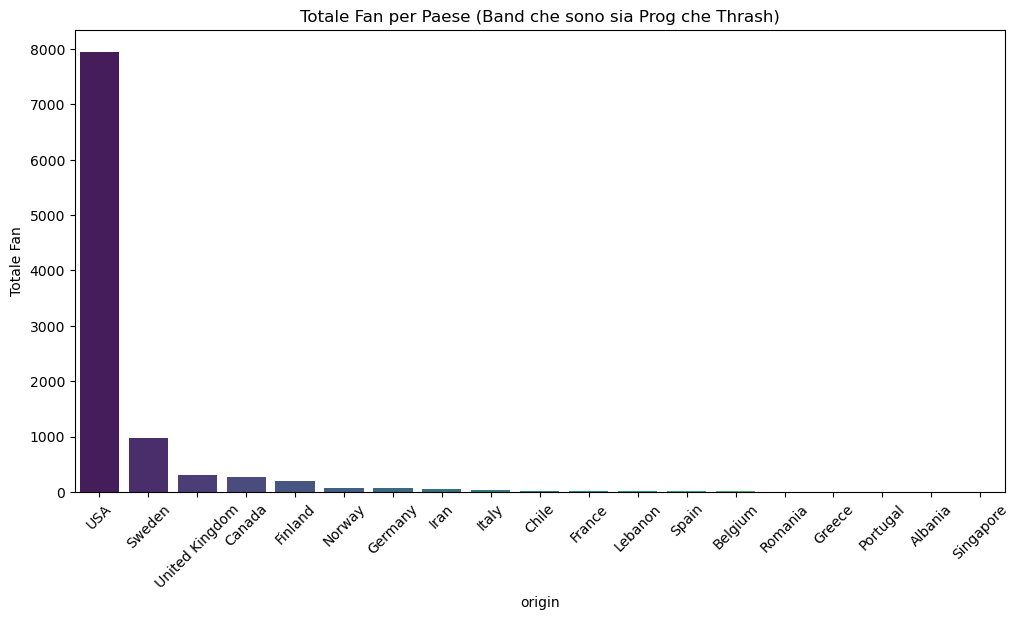

In [47]:
# 3. Raggruppa e Aggrega (Fase 3 Infografica)
# Vogliamo i fan TOTALI per paese di origine
fans_by_country = target_bands.groupby('origin')['fans'].sum().sort_values(ascending=False).reset_index()

# Visualizzazione Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=fans_by_country, x='origin', y='fans', palette="viridis")
plt.xticks(rotation=45)
plt.title("Totale Fan per Paese (Band che sono sia Prog che Thrash)")
plt.ylabel("Totale Fan")
plt.show()

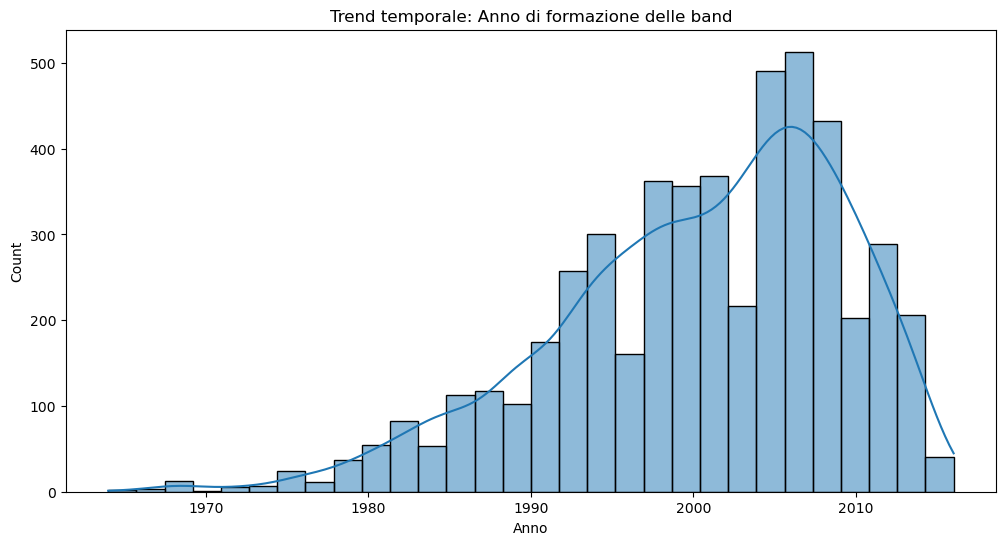

In [48]:
# ESERCIZIO 3: Istogramma date di formazione
# Domanda: "Si nota qualche trend?" [cite: 26]
plt.figure(figsize=(12, 6))
# Filtriamo i NaN dalla colonna formed solo per questo grafico
sns.histplot(data=df.dropna(subset=['formed']), x='formed', bins=30, kde=True)
plt.title("Trend temporale: Anno di formazione delle band")
plt.xlabel("Anno")
plt.show()